In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = '/kaggle/input/marketing/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv'
df = pd.read_csv(file_name)

df.head(25)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


In [2]:
print('Raw        : ',df.shape[0])
print('Columns    : ', df.shape[1])
print('\nFeatures   : \n', df.columns.tolist())
print('\nMissing Values : \n', df.isnull().sum())
print('\nUnique Value   : \n', df.nunique())

Raw        :  548
Columns    :  7

Features   : 
 ['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion', 'week', 'SalesInThousands']

Missing Values : 
 MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

Unique Value   : 
 MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64


In [3]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


EDA

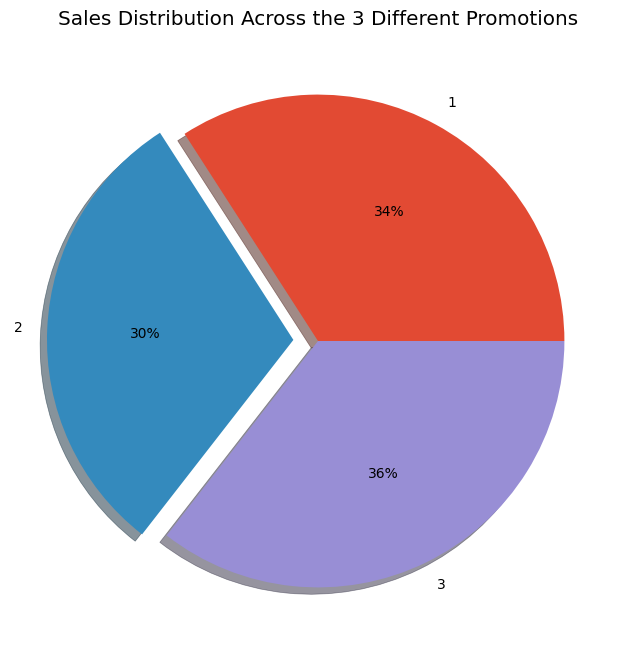

In [4]:
plt.style.use('ggplot')

ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize = (8,8),
                                                               autopct='%1.0f%%',
                                                               shadow=True,
                                                               explode = (0,0.1,0))

ax.set_ylabel('')
ax.set_title('Sales Distribution Across the 3 Different Promotions')

plt.show()

In [5]:
# Now we view tge promotions in each market size
df.groupby(['Promotion','MarketSize']).count()['MarketID'].unstack()

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


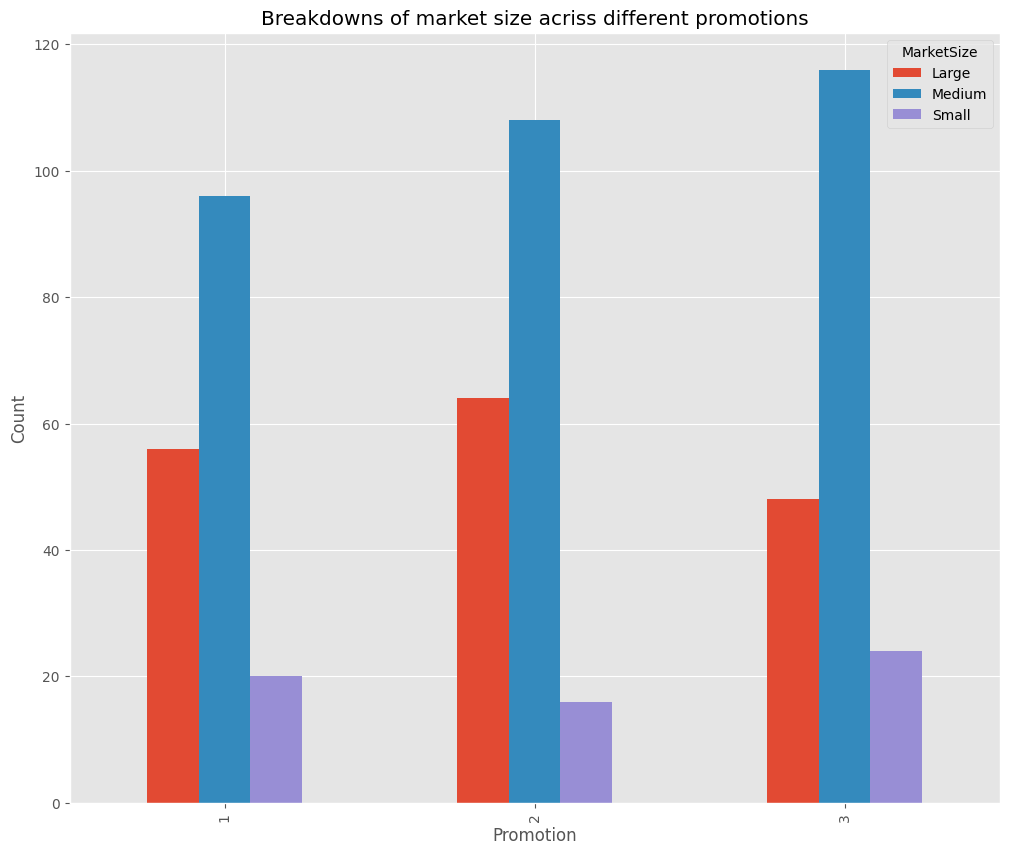

In [6]:
# Put this into plot

ax = df.groupby(['Promotion','MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
kind='bar',
figsize= (12,10),
grid=True)


ax.set_ylabel('Count')
ax.set_title('Breakdowns of market size acriss different promotions')

plt.show()

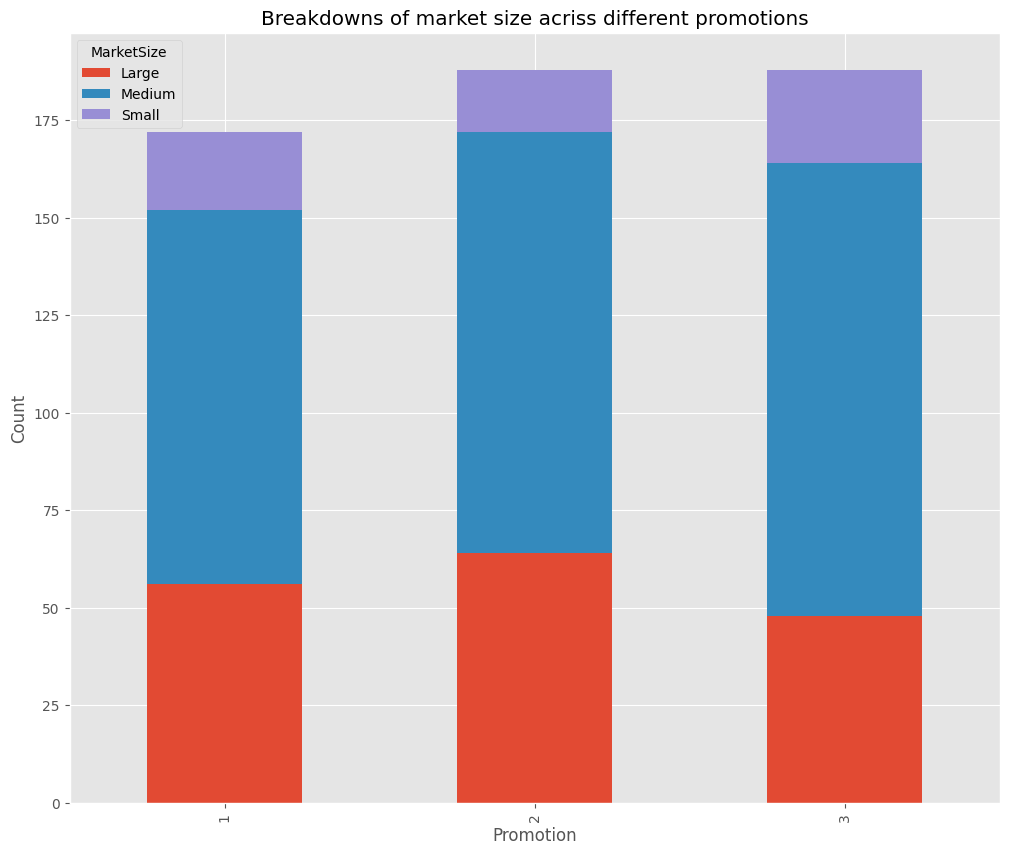

In [7]:
# Put this into plot

ax = df.groupby(['Promotion','MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
kind='bar',
figsize= (12,10),
grid=True,
stacked=True)


ax.set_ylabel('Count')
ax.set_title('Breakdowns of market size acriss different promotions')

plt.show()

In [8]:
df.groupby('AgeOfStore').count()['MarketID']

AgeOfStore
1     80
2     20
3     32
4     44
5     44
6     36
7     40
8     40
9     28
10    24
11    16
12    24
13    20
14    12
15     8
17     4
18     8
19    20
20     4
22    12
23     8
24    12
25     4
27     4
28     4
Name: MarketID, dtype: int64

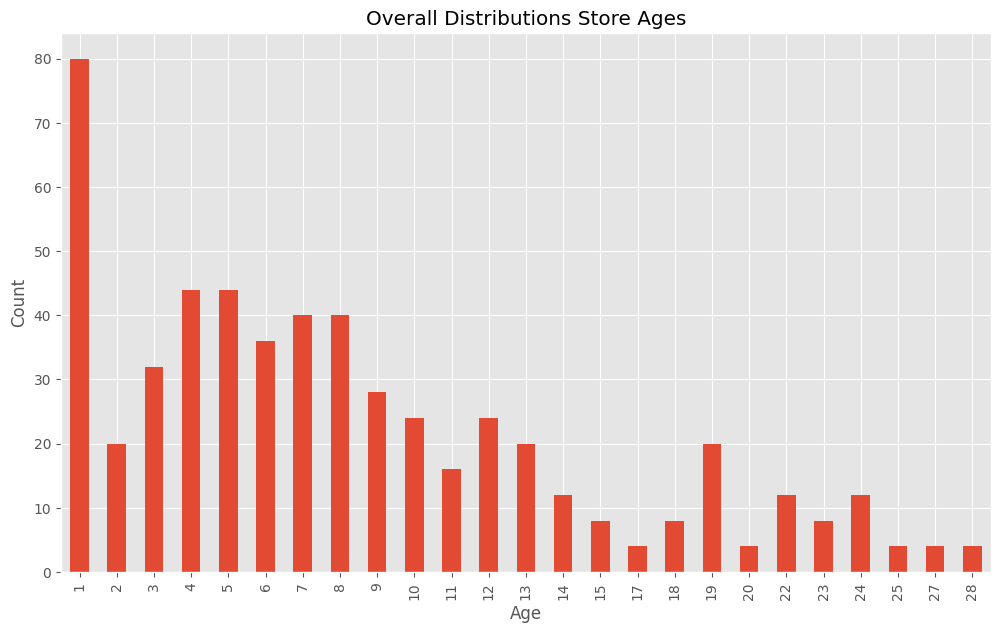

In [9]:
ax = df.groupby('AgeOfStore').count()['MarketID'].plot(
kind='bar',
figsize=(12,7),
grid=True)

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Overall Distributions Store Ages')

plt.show()

In [10]:
df['MarketID'].value_counts()

MarketID
3     88
10    80
5     60
6     60
7     60
1     52
8     48
9     40
4     36
2     24
Name: count, dtype: int64

In [11]:
df.groupby(['AgeOfStore','Promotion']).count()['MarketID']

AgeOfStore  Promotion
1           1            24
            2            36
            3            20
2           1             8
            2             8
            3             4
3           1            16
            2            12
            3             4
4           1            16
            2            12
            3            16
5           1             8
            2            12
            3            24
6           1            20
            2             4
            3            12
7           1             4
            2            24
            3            12
8           1            12
            2             8
            3            20
9           1             8
            2            12
            3             8
10          2            16
            3             8
11          1             4
            3            12
12          1            12
            2             4
            3             8
13          1            1

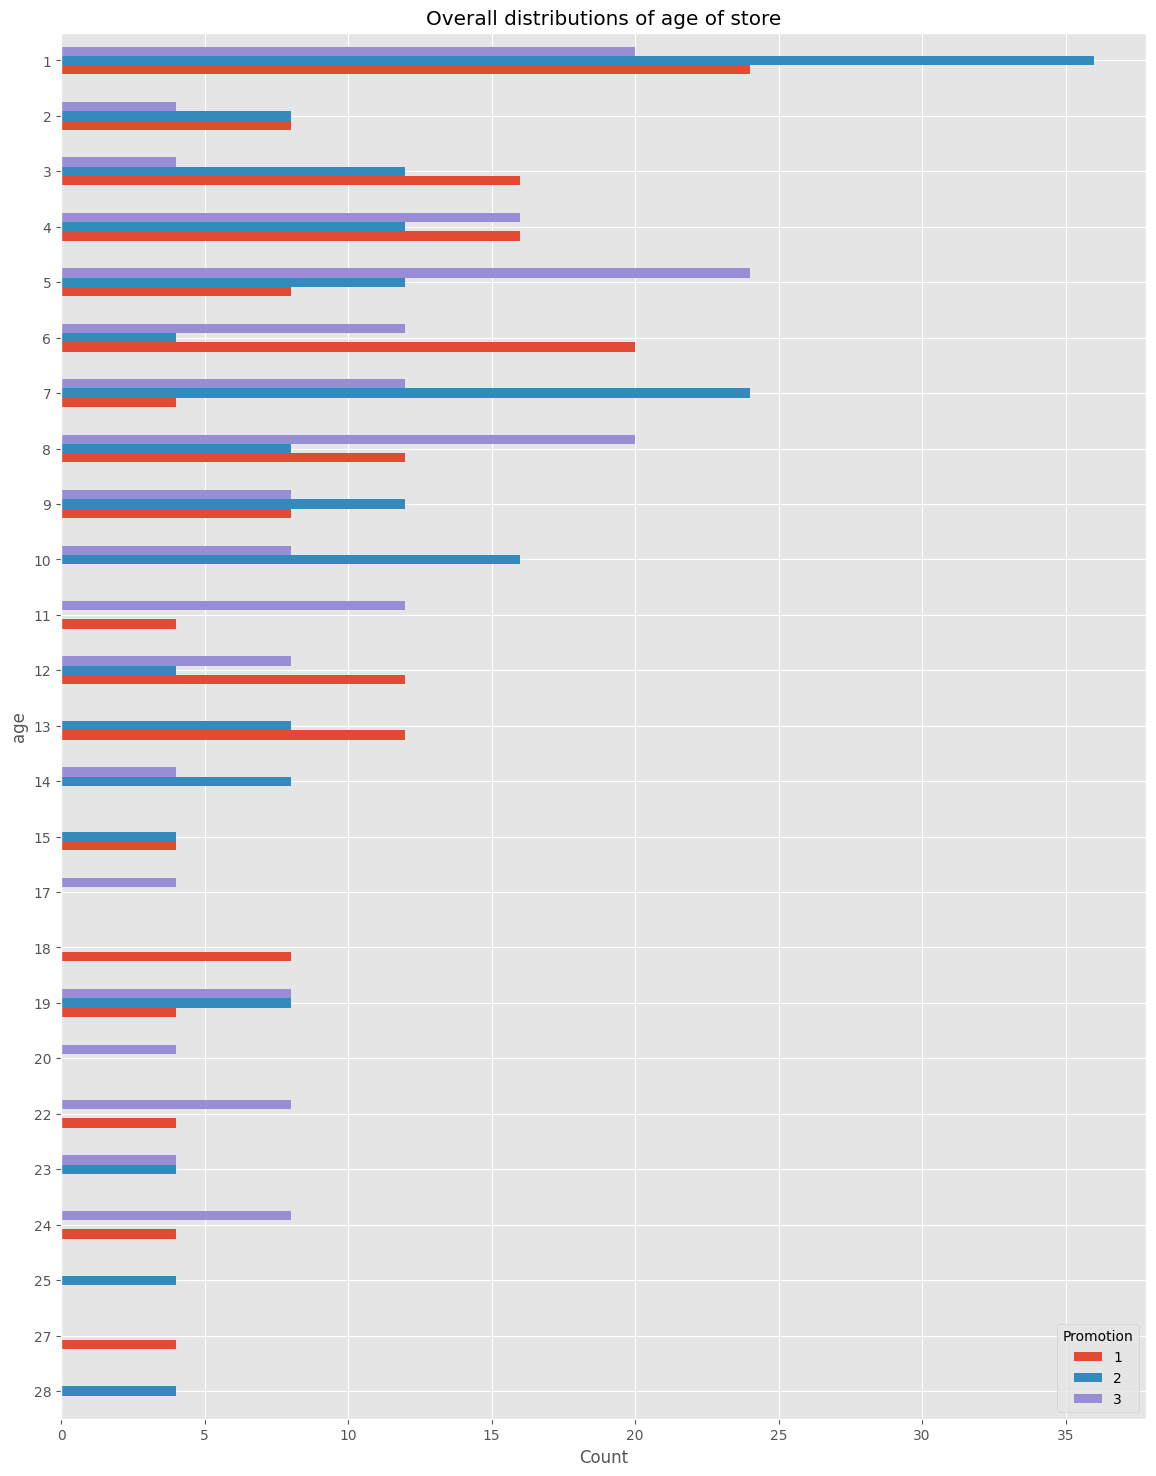

In [12]:
# Let's plot 

ax = df.groupby(['AgeOfStore','Promotion']).count()['MarketID'].unstack('Promotion').iloc[::-1].plot(
kind='barh',
figsize=(14,18),
grid=True)

ax.set_ylabel('age')
ax.set_xlabel('Count')

ax.set_title('Overall distributions of age of store')

plt.show()

In [13]:
df.groupby(['Promotion']).describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


Tabel ini memudahkan untuk memahami distribusi usia toko secara keseluruhan dari statistik ringkas kami.
Kelompok uji memiliki profil usia yang serupa dan rata-rata usia toko adalah sekitar 8 hingga 9 tahun untuk ketiga kelompok ini. 
Sebagian besar toko berusia 10 - 12 tahun atau bahkan lebih muda. Dapat terlihat bahwa profil toko serupa satu sama lain. 
Hal ini menunjukkan bahwa kelompok sampel kami terkendali dengan baik dan hasil pengujian A/B akan bermakna dan dapat dipercaya.

A/B testing 

In [14]:
means = df.groupby('Promotion')['SalesInThousands'].mean()
stds = df.groupby('Promotion')['SalesInThousands'].std()
ns = df.groupby('Promotion')['SalesInThousands'].count()


T-value:

T-value adalah angka yang mengukur seberapa besar perbedaan antara dua kelompok data. Semakin besar nilainya, semakin besar perbedaannya. Jika nilainya kecil, mungkin perbedaannya juga kecil. T-value memberi tahu kita seberapa kuat perbedaan antara kelompok-kelompok data itu.

P-value:

P-value adalah angka yang memberi tahu kita seberapa mungkin perbedaan yang kita lihat antara dua kelompok data terjadi secara kebetulan. Semakin kecil nilainya, semakin kecil kemungkinan perbedaan itu terjadi karena kebetulan. Jika nilainya sangat kecil, biasanya kita menganggap perbedaan tersebut signifikan secara statistik.

In [15]:
means

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

In [16]:
stds

Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64

In [17]:
ns

Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64

Comparing promotion 1 vs promotion 2 in an A/B test

In [18]:
# Computing the t and p values using scipy

from scipy import stats

t, p = stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                      df.loc[df['Promotion'] == 2, 'SalesInThousands'].values,
                      equal_var=False)

print('t-value = ', t)
print('p-value = ', p) # 0.00000000042903687179871785 

t-value =  6.42752867090748
p-value =  4.2903687179871785e-10


t-value besar, ini menunjukkan bahwa perbedaan antara rata-rata kedua kelompok (promotion 1 dan 2) itu signifikan dan tidak terjadi secara kebetulan.

p yang sangat kecil menunjukkan bahwa perbedaan antara rata-rata kedua kelompok adalah signifikan secara statistik.

Jadi, kombinasi nilai t yang besar dan nilai p yang kecil menunjukkan bahwa perbedaan antara kedua kelompok adalah signifikan



In [19]:
df.loc[df['Promotion'] == 1, 'SalesInThousands'].values.sum()

9993.03

In [20]:
df.loc[df['Promotion'] == 2, 'SalesInThousands'].values.sum()

8897.929999999998

Comparising promotion 1 vs promotion 3 in an A/B test

In [21]:
t, p = stats.ttest_ind(
        df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
        df.loc[df['Promotion'] == 3, 'SalesInThousands'].values,
        equal_var=False)


print('T-Value = ', t)
print('P-value = ', p)

T-Value =  1.5560224307758634
P-value =  0.12059147742229478


Analisis : 
Nilai T-Value adalah positif, menunjukkan bahwa terdapat perbedaan antara kelompok, meskipun tingkat signifikansinya  tidak terlalu besar.

P-value adalah probabilitas perbedaan antar kelompok terjadi secara kebetulan. Semakin kecil nilai P-value, semakin signifikan perbedaannya. Dalam konteks ini, P-value (0.1205) lebih besar dari tingkat signifikansi yang umumnya digunakan (misalnya 0.05), yang menunjukkan bahwa perbedaan yang diamati mungkin terjadi secara kebetulan.

Dengan demikian, hasil analisis menunjukkan bahwa perbedaan antara kelompok (promotion 1 dan promotion 3) tidak cukup signifikan secara statistik untuk dianggap sebagai hasil yang pasti. Simpelnya dua hal ini sebenarnya sama saja. 

In [22]:
t, p = stats.ttest_ind(
        df.loc[df['Promotion'] == 2, 'SalesInThousands'].values,
        df.loc[df['Promotion'] == 3, 'SalesInThousands'].values,
        equal_var=False)


print('T-Value = ', t)
print('P-value = ', p)

T-Value =  -4.88139271089348
P-value =  1.5692733176039892e-06


Dengan demikian, hasil analisis menunjukkan bahwa terdapat perbedaan yang signifikan secara statistik antara dua kelompok dalam sampel, dengan perbedaan tersebut memiliki arah yang berlawanan. Ini menunjukkan bahwa ada faktor atau variabel yang berbeda secara signifikan antara dua kelompok tersebut.

KESIMPULAN : 

Promotion 1 vs Promotion 2:

T-Value yang tinggi (positif) dan P-Value yang sangat rendah menunjukkan bahwa ada perbedaan signifikan antara Promotion 1 dan Promotion 2. Promotion 1 lebih unggul daripada Promotion 2 secara signifikan.

Promotion 1 vs Promotion 3:

T-Value yang rendah dan P-Value yang tinggi menunjukkan bahwa tidak ada perbedaan signifikan antara Promotion 1 dan Promotion 3. Kedua promosi memiliki kinerja yang serupa secara statistik.

Promotion 2 vs Promotion 3:

T-Value yang rendah (negatif) dan P-Value yang sangat rendah menunjukkan bahwa ada perbedaan signifikan antara Promotion 2 dan Promotion 3. Promotion 2 lebih unggul daripada Promotion 3 secara signifikan.

Dengan demikian, berdasarkan hasil A/B testing, Promotion 1 lebih unggul daripada Promotion 2, sementara Promotion 2 lebih unggul daripada Promotion 3.